<a href="https://www.kaggle.com/code/selimkoc/notebook2f4620f073?scriptVersionId=208418651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [437]:
import numpy as np 
import pandas as pd 
import random
import seaborn as sns
import matplotlib.pyplot as plt
import geocoder

In [438]:
pd.set_option('display.max_columns', None)
data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')

/tmp/ipykernel_30/2555144767.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')


In [439]:
data.shape

(102599, 26)

In [440]:
data_part = data.iloc[:data.shape[0] // 3, :]
"""
The shape function returns the number of rows and columns in the DataFrame.
`data.shape[0]` retrieves the total number of rows.
The `//` operator performs integer division to divide the rows into three parts.
"""



'\nThe shape function returns the number of rows and columns in the DataFrame.\n`data.shape[0]` retrieves the total number of rows.\nThe `//` operator performs integer division to divide the rows into three parts.\n'

In [441]:
data_part.shape

(34199, 26)

In [442]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [443]:
add_random_missing_values(data_part,0.05)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254.0,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,NaN,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102.0,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,NaN,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,NaN,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,NaN,NaN,flexible,Private room,NaN,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755.0,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,NaN,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689.0,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,NaN,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,NaN,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,19886682.0,ENTIRE APARTMENT: BRIGHT & CHARMING- best loca...,6.199416e+10,verified,Paloma,Manhattan,East Village,40.72338,-73.98346,United States,US,False,flexible,Entire home/apt,2014.0,NaN,$188,2.0,14.0,7/7/2019,NaN,5.0,2.0,5.0,"WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...",NaN
34195,NaN,Luxury basement apartment in newly built house,8.686235e+10,verified,Ester,Queens,NaN,40.73920,-73.79181,United States,US,True,flexible,Entire home/apt,2022.0,$407,$81,1.0,1.0,8/17/2018,0.09,2.0,1.0,363.0,No parties. No loud music or noise late at nig...,NaN
34196,NaN,Suite 18 - Cozy room w/ Private Bathroom,6.136332e+10,verified,Daisy,Brooklyn,Brighton Beach,40.57987,-73.95889,United States,US,False,moderate,Private room,2005.0,$463,$93,1.0,43.0,5/27/2019,3.82,2.0,5.0,283.0,No Smoking. No pets except by special arrange...,NaN
34197,19888339.0,Room available in spacious apartment UWS,4.099341e+10,unconfirmed,Claudia,Manhattan,Upper West Side,40.78493,-73.97683,United States,NaN,False,moderate,Private room,NaN,$271,$54,4.0,4.0,1/2/2019,0.42,2.0,1.0,0.0,"No pet, No smoking - Quite hours : 9pm - 8am",NaN


In [444]:
# Count missing values per column
missing_values = data_part.isnull().sum()

# Print columns with missing values
print(missing_values[missing_values > 0])

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(data_part)) * 100
print(missing_percentage[missing_percentage > 0])


NAME                                117
host_identity_verified              158
host name                           225
neighbourhood group                  27
neighbourhood                        16
lat                                   8
long                                  8
country                              87
country code                         79
instant_bookable                     79
cancellation_policy                  50
Construction year                   146
price                                98
service fee                          86
minimum nights                      189
number of reviews                    34
last review                        5549
reviews per month                  5535
review rate number                  113
calculated host listings count       83
availability 365                    178
house_rules                       11322
license                           34198
dtype: int64
NAME                               0.342115
host_identity_verified 

In [445]:
def summarize_dataset(data, num_head=5, num_tail=5, drop_columns=None, drop_duplicates=False):
    """
    Summarizes a DataFrame with additional type analysis and parameter validation.

    Parameters:
    data (DataFrame): The DataFrame to summarize.
    num_head (int): Specifies how many rows to display from the beginning.
    num_tail (int): Specifies how many rows to display from the end.
    drop_columns (list): List of columns to drop.
    drop_duplicates (bool): Used to remove duplicates from the DataFrame.

    Returns:
    DataFrame: The processed DataFrame.
    """
    # Parameter validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if not isinstance(num_head, int) or num_head < 0:
        raise ValueError("The `num_head` parameter must be a non-negative integer.")
    if not isinstance(num_tail, int) or num_tail < 0:
        raise ValueError("The `num_tail` parameter must be a non-negative integer.")
    if drop_columns and not isinstance(drop_columns, list):
        raise ValueError("The `drop_columns` parameter must be a list of column names.")
    
    # Display the first few rows
    print(f"First {num_head} rows:")
    print(data.head(num_head))
    print("\n")
    
    # Display the last few rows
    print(f"Last {num_tail} rows:")
    print(data.tail(num_tail))
    print("\n")
    
    # Display column names and data types
    print("Columns and Data Types:")
    print(data.dtypes)
    print("\n")
    
    # Analyze categorical and numerical columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
    print(f"Categorical Columns: {categorical_cols}")
    print(f"Numeric Columns: {numeric_cols}")
    print("\n")
    
    # Check for missing values
    missing_values = data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print(f"Missing Values:\n{missing_columns}")
    print("\n")
    
    # Display statistical summary for numerical columns
    print("Statistical Summary:")
    print(data[numeric_cols].describe())
    print("\n")
    
    # Display the shape of the dataset
    print("Data Shape:")
    print(data.shape)
    print("\n")
    
    # Check for duplicate rows
    num_duplicates = data.duplicated().sum()
    print(f"Number of duplicated rows: {num_duplicates}")
    print("\n")

    # Drop duplicate rows if requested
    if drop_duplicates:
        initial_rows = data.shape[0]
        if drop_columns:
            data.drop_duplicates(subset=drop_columns, inplace=True)
        else:
            data.drop_duplicates(inplace=True)
        dropped_rows = initial_rows - data.shape[0]
        print(f"Number of dropped rows: {dropped_rows}")
    
    return data


In [446]:
summarize_dataset(data_part)

First 5 rows:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.9723

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,19886682,ENTIRE APARTMENT: BRIGHT & CHARMING- best loca...,61994162754,verified,Paloma,Manhattan,East Village,40.72338,-73.98346,United States,US,False,flexible,Entire home/apt,2014.0,$938,$188,2.0,14.0,7/7/2019,1.39,5.0,2.0,5.0,"WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...",NaN
34195,19887235,Luxury basement apartment in newly built house,86862347696,verified,Ester,Queens,Fresh Meadows,40.73920,-73.79181,United States,US,True,flexible,Entire home/apt,2022.0,$407,$81,1.0,1.0,8/17/2018,0.09,2.0,1.0,363.0,No parties. No loud music or noise late at nig...,NaN
34196,19887787,Suite 18 - Cozy room w/ Private Bathroom,61363320397,verified,Daisy,Brooklyn,Brighton Beach,40.57987,-73.95889,United States,US,False,moderate,Private room,2005.0,$463,$93,1.0,43.0,5/27/2019,3.82,2.0,5.0,283.0,No Smoking. No pets except by special arrange...,NaN
34197,19888339,Room available in spacious apartment UWS,40993410495,unconfirmed,Claudia,Manhattan,Upper West Side,40.78493,-73.97683,United States,US,False,moderate,Private room,2011.0,$271,$54,4.0,4.0,1/2/2019,0.42,2.0,1.0,0.0,"No pet, No smoking - Quite hours : 9pm - 8am",NaN


# Data Cleaning

In [447]:
df_temp = data_part.copy()

In [448]:
# Rename columns to standardize them, avoiding potential issues with case sensitivity and spaces in column names
df_temp.columns = [col.lower().replace(" ","_") for col in df_temp.columns]

In [449]:
df_temp.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [450]:
# Remove dollar sign and commas, then convert to float
df_temp['price'] = df_temp['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_temp['service_fee'] = df_temp['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [451]:
df_temp.head(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [452]:
# Convert 'last review' column to datetime
df_temp['last_review'] = pd.to_datetime(df_temp['last_review'], errors='coerce')
df_temp['last_review'].head()

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


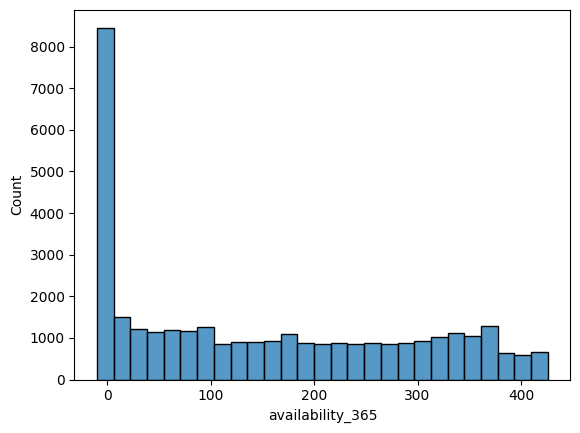

In [453]:
sns.histplot(df_temp['availability_365'])
plt.show()

In [454]:
df_temp['host_name'].value_counts() #we dont have unique names so we cant drop host_id

host_name
Michael      297
David        274
John         203
Sarah        185
Alex         177
            ... 
Dymphna        1
R David        1
Kenzo          1
Atiya          1
Kristiina      1
Name: count, Length: 8776, dtype: int64

In [455]:
df_temp['country_code'] 
df_temp['country_code'].value_counts()  # Dropping the 'country_code' column as it doesn't provide any meaningful insights

country_code
US    34120
Name: count, dtype: int64

In [456]:
df_temp['house_rules'] # Dropping the 'house_rules' column since I am not gonna work with text data

0        Clean up and treat the home the way you'd like...
1        Pet friendly but please confirm with me if the...
2        I encourage you to use my kitchen, cooking and...
3                                                      NaN
4        Please no smoking in the house, porch or on th...
                               ...                        
34194    WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...
34195    No parties. No loud music or noise late at nig...
34196    No Smoking.  No pets except by special arrange...
34197        No pet, No smoking - Quite hours : 9pm - 8am 
34198    No smoking please, no pets to protect our hard...
Name: house_rules, Length: 34199, dtype: object

In [457]:
df_temp['license'] 
df_temp['license'].value_counts()  # We can drop this column 

license
41662/AL    1
Name: count, dtype: int64

In [458]:
df_temp['country'] 
df_temp['country'].value_counts() # We can drop this column too

country
United States    34112
Name: count, dtype: int64

In [459]:
# Drop columns with insufficient data
columns_to_drop = ['country_code',"country",'house_rules','license']
df_temp = df_temp.drop(columns_to_drop, axis=1)

In [460]:
df_temp.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Handling Missing Data


In [461]:
df_temp.isna().sum()

id                                   0
name                               117
host_id                              0
host_identity_verified             158
host_name                          225
neighbourhood_group                 27
neighbourhood                       16
lat                                  8
long                                 8
instant_bookable                    79
cancellation_policy                 50
room_type                            0
construction_year                  146
price                               98
service_fee                         86
minimum_nights                     189
number_of_reviews                   34
last_review                       5549
reviews_per_month                 5535
review_rate_number                 113
calculated_host_listings_count      83
availability_365                   178
dtype: int64

### **name**

In [462]:
# For the name column we can scrape data on the google maps to find the data but this is not that big project so I just fill with "Unknown"
df_temp['name']=df_temp['name'].fillna('Unknown')

### **host_id**

In [463]:
df_temp['host_id'] = df_temp['host_id'].fillna(0)

### **host_identity_verified**

In [464]:
df_temp['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    17097
verified       16944
Name: count, dtype: int64

In [465]:
df_temp['host_identity_verified'] = df_temp['host_identity_verified'].fillna('unconfirmed')

### **host_name**

In [466]:
# Count occurrences of 'host_id'
host_id_counts = df_temp['host_id'].value_counts()

# Filter for 'host_id's that appear more than once
host_ids_multiple_occurrences = host_id_counts[host_id_counts > 1]
# host_ids_multiple_occurrences is null
# Trying to check if there are any 'host_id's with missing 'host_name'. 
# If the 'host_id' is the same, we could potentially fill the missing 'host_name' from the matching rows.
# However, since no matches were found, I will replace the 'null' values of 'host_name' with 'Unknown'.

df_temp['host_name']=df_temp['host_name'].fillna('Unknown')

### **neighbourhood_group**

In [467]:
df_temp['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        15117
Brooklyn         14704
Queens            3475
Bronx              636
Staten Island      238
brookln              1
manhatan             1
Name: count, dtype: int64

In [468]:
# Correcting the spelling of 'neighbourhood group' values in the DataFrame
df_temp.loc[df_temp['neighbourhood_group']=='manhatan', 'neighbourhood_group'] = 'Manhattan'
df_temp.loc[df_temp['neighbourhood_group']=='brookln', 'neighbourhood_group'] = 'Brooklyn'
df_temp['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        15118
Brooklyn         14705
Queens            3475
Bronx              636
Staten Island      238
Name: count, dtype: int64

In [469]:
df_temp['neighbourhood_group'].isna().sum()

27

In [470]:
def get_neighbourhood(lat, long):
    g = geocoder.osm([lat, long], method='reverse')
    return g.raw.get('address', {}).get('suburb', '')

print(get_neighbourhood(40.64749, -73.97237)) #40.64749 -73.97237 Brooklyn normally, output is also Brooklyn.We can use it


Brooklyn


In [471]:
missing_neighbourhood_idx = df_temp['neighbourhood_group'].isnull()
df_temp.loc[missing_neighbourhood_idx, 'neighbourhood_group'] = df_temp.loc[missing_neighbourhood_idx].apply(lambda x: get_neighbourhood(x.lat, x.long), axis=1)

In [472]:
df_temp['neighbourhood_group'].isna().sum()

0

### **neighbourhood & lat & long**

In [473]:
df_temp['neighbourhood'].value_counts()

neighbourhood
Williamsburg          2952
Bedford-Stuyvesant    2582
Harlem                1985
Bushwick              1666
Upper West Side       1510
                      ... 
Woodrow                  1
Richmondtown             1
West Farms               1
Todt Hill                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [474]:
df_temp['neighbourhood'].isna().sum()

16

In [475]:
df_temp["lat"].describe()

count    34191.000000
mean        40.728860
std          0.054266
min         40.499790
25%         40.689180
50%         40.722320
75%         40.763710
max         40.911690
Name: lat, dtype: float64

In [476]:
df_temp["lat"].isna().sum()

8

In [477]:
df_temp["long"].describe()

count    34191.000000
mean       -73.953836
std          0.043133
min        -74.242850
25%        -73.982485
50%        -73.956290
75%        -73.938925
max        -73.712990
Name: long, dtype: float64

In [478]:
df_temp["long"].isna().sum()

8

In [479]:
# Since missing values in 'neighbourhood', 'lat', and 'long' are few and the distance between coordinates is not significantly large,
# I am leaving them as is(It can also be drop). Using a technique similar to what I applied for 'neighbourhood group', 
# these values can easily be filled or adjusted by geocoding or looking up the corresponding neighbourhood based on the coordinates.


### **instant_bookable**

In [480]:
df_temp["instant_bookable"].isna().sum()

79

In [481]:
# We can fill the null values in 'instant_bookable' with either True or False.
# I will choose to fill with True, as it might be more beneficial for the hosts
df_temp['instant_bookable'] = df_temp['instant_bookable'].fillna('True')

### **cancellation_policy**

In [482]:
df_temp["cancellation_policy"].value_counts()

cancellation_policy
moderate    11451
flexible    11368
strict      11330
Name: count, dtype: int64

### **room_type**

In [483]:
df_temp["room_type"].value_counts() #nothing to do

room_type
Entire home/apt    18028
Private room       15526
Shared room          645
Name: count, dtype: int64

### **construction_year**

In [484]:
df_temp["construction_year"].value_counts()

construction_year
2008.0    1757
2019.0    1735
2014.0    1734
2010.0    1717
2012.0    1716
2006.0    1715
2022.0    1712
2005.0    1709
2009.0    1706
2017.0    1703
2015.0    1698
2004.0    1697
2007.0    1695
2021.0    1695
2003.0    1693
2020.0    1685
2011.0    1683
2013.0    1677
2018.0    1677
2016.0    1649
Name: count, dtype: int64

### **price & service_fee**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


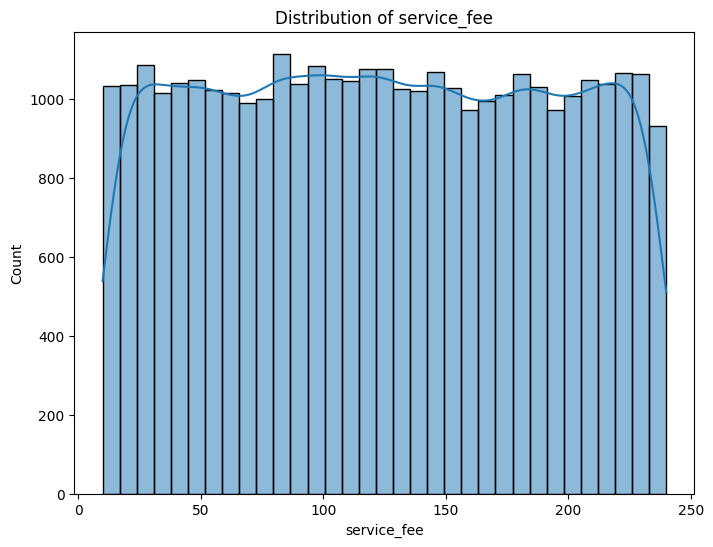

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


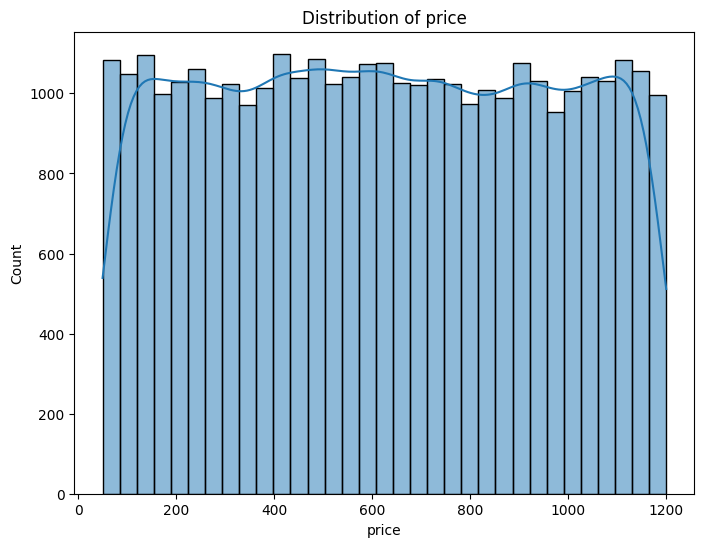

In [485]:
# List of selected columns to plot
selected_cols = ['service_fee', 'price']

# Plot each column separately
for col in selected_cols:
    plt.figure(figsize=(8, 6))  # Adjust the size for each individual plot
    sns.histplot(df_temp[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [486]:
# Fill the columns with median (balanced data)
df_temp['price'] = df_temp['price'].fillna(df_temp['price'].median())
df_temp['service_fee'] = df_temp['service_fee'].fillna(df_temp['service_fee'].median())


In [487]:
df_temp["host_id"] = df_temp["host_id"].fillna(0)


In [488]:
df_temp.isna().sum()

id                                   0
name                                 0
host_id                              0
host_identity_verified               0
host_name                            0
neighbourhood_group                  0
neighbourhood                       16
lat                                  8
long                                 8
instant_bookable                     0
cancellation_policy                 50
room_type                            0
construction_year                  146
price                                0
service_fee                          0
minimum_nights                     189
number_of_reviews                   34
last_review                       5549
reviews_per_month                 5535
review_rate_number                 113
calculated_host_listings_count      83
availability_365                   178
dtype: int64

In [489]:
df_temp.isna().sum()

id                                   0
name                                 0
host_id                              0
host_identity_verified               0
host_name                            0
neighbourhood_group                  0
neighbourhood                       16
lat                                  8
long                                 8
instant_bookable                     0
cancellation_policy                 50
room_type                            0
construction_year                  146
price                                0
service_fee                          0
minimum_nights                     189
number_of_reviews                   34
last_review                       5549
reviews_per_month                 5535
review_rate_number                 113
calculated_host_listings_count      83
availability_365                   178
dtype: int64

In [490]:
df_temp.isna().sum()

id                                   0
name                                 0
host_id                              0
host_identity_verified               0
host_name                            0
neighbourhood_group                  0
neighbourhood                       16
lat                                  8
long                                 8
instant_bookable                     0
cancellation_policy                 50
room_type                            0
construction_year                  146
price                                0
service_fee                          0
minimum_nights                     189
number_of_reviews                   34
last_review                       5549
reviews_per_month                 5535
review_rate_number                 113
calculated_host_listings_count      83
availability_365                   178
dtype: int64